<a href="https://colab.research.google.com/github/najiaahmedd/CIND820_InitialResults/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data1<-read.csv("projectfiles.csv")

In [ ]:
install.packages("mice")
library(mice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [ ]:
dataclean<-subset(data1, select = c(Year,Disaster.Group,Disaster.Subgroup, Disaster.Type, Disaster.Subtype, Country, Region, Total.Deaths, No.Injured, No.Affected, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))
dataclean1<-subset(data1, select = c(Year,Total.Deaths, No.Injured, No.Affected, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))
data2<-subset(dataclean, select = c(Year,Disaster.Group,Disaster.Subgroup, Disaster.Type, Disaster.Subtype, Country, Region, Total.Deaths, No.Injured, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))
data2$Year <- as.character(data2$Year)

In [ ]:
imputedData<-mice (data2, m=6, maxit=50, meth='pmm', seed=600)


 iter imp variable
  1   1  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   2  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   3  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   4  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   5  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   6  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  2   1  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...

Warning message:
“Number of logged events: 47”


In [ ]:
completedata<-complete(imputedData, 1)
completedata$Year <- as.integer(completedata$Year)
head(completedata)

,Year,Disaster.Group,Disaster.Subgroup,Disaster.Type,Disaster.Subtype,Country,Region,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1970,Natural,Hydrological,Flood,,Argentina,South America,36,200,26923,423,25000,194000,10000
2,1970,Natural,Meteorological,Storm,Tropical cyclone,Australia,Australia and New Zealand,13,1,200,35020,72475,1510,60000
3,1970,Natural,Hydrological,Flood,,Benin,Western Africa,9,26,826,450,200,150000,60000
4,1970,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Southern Asia,300000,5933,300000,3648000,86400,194000,115000
5,1970,Natural,Meteorological,Storm,,Bangladesh,Southern Asia,17,12,75,110,210000,194000,200500
6,1970,Natural,Hydrological,Flood,,Bangladesh,Southern Asia,6908,155715,125000,10000000,25000,9450000,400000


In [ ]:
unique(completedata$Region)
unique(completedata$Disaster.Type)
unique(completedata$Disaster.Subgroup)
unique(completedata$Country)

#Will need to convert these character variables into factor variables to use in decision tree 
#Dependent variable = Total.Deaths

completedata$Region <- as.factor(completedata$Region)
completedata$Disaster.Type <- as.factor(completedata$Disaster.Type)
completedata$Disaster.Subtype <- as.factor(completedata$Disaster.Subtype)
completedata$Disaster.Subgroup <- as.factor(completedata$Disaster.Subgroup)
completedata$Country <- as.factor(completedata$Country)


str(completedata)

[1] "South America"             "Australia and New Zealand"
 [3] "Western Africa"            "Southern Asia"            
 [5] "Caribbean"                 "Southern Africa"          
 [7] "Northern America"          "Western Europe"           
 [9] "Eastern Asia"              "Central America"          
[11] "Western Asia"              "Eastern Africa"           
[13] "Eastern Europe"            "South-Eastern Asia"       
[15] "Middle Africa"             "Southern Europe"          
[17] "Melanesia"                 "Northern Europe"          
[19] "Northern Africa"           "Micronesia"               
[21] "Polynesia"                 "Russian Federation"       
[23] "Central Asia"

[1] "Flood"                 "Storm"                 "Drought"              
 [4] "Landslide"             "Earthquake"            "Epidemic"             
 [7] "Wildfire"              "Mass movement (dry)"   "Extreme temperature " 
[10] "Volcanic activity"     "Insect infestation"    "Impact"               
[13] "Animal accident"       "Glacial lake outburst"

[1] "Hydrological"      "Meteorological"    "Climatological"   
[4] "Geophysical"       "Biological"        "Extra-terrestrial"

[1] "Argentina"                                                 
  [2] "Australia"                                                 
  [3] "Benin"                                                     
  [4] "Bangladesh"                                                
  [5] "Brazil"                                                    
  [6] "Barbados"                                                  
  [7] "Botswana"                                                  
  [8] "Canada"                                                    
  [9] "Switzerland"                                               
 [10] "China"                                                     
 [11] "Côte d’Ivoire"                                             
 [12] "Colombia"                                                  
 [13] "Costa Rica"                                                
 [14] "Cuba"                                                      
 [15] "Cyprus"                                                    
 [16] "Dominica"                                                  
 [17] "Ecuador"                                                   
 [18] "Ethiopia"                                                  
 [19] "France"                                                    
 [20] "Guadeloupe"                                                
 [21] "Hong Kong"                                                 
 [22] "Hungary"                                                   
 [23] "Indonesia"                                                 
 [24] "India"                                                     
 [25] "Chile"                                                     
 [26] "Afghanistan"                                               
 [27] "Belgium"                                                   
 [28] "Cameroon"                                                  
 [29] "Spain"                                                     
 [30] "Ghana"                                                     
 [31] "Guyana"                                                    
 [32] "Honduras"                                                  
 [33] "Germany Fed Rep"                                           
 [34] "Fiji"                                                      
 [35] "United Kingdom of Great Britain and Northern Ireland (the)"
 [36] "Haiti"                                                     
 [37] "Central African Republic"                                  
 [38] "Algeria"                                                   
 [39] "Gambia (the)"                                              
 [40] "Guatemala"                                                 
 [41] "Belize"                                                    
 [42] "Bolivia (Plurinational State of)"                          
 [43] "Czechoslovakia"                                            
 [44] "Austria"                                                   
 [45] "Egypt"                                                     
 [46] "Grenada"                                                   
 [47] "Burkina Faso"                                              
 [48] "Denmark"                                                   
 [49] "Guam"                                                      
 [50] "Bulgaria"                                                  
 [51] "Comoros (the)"                                             
 [52] "Djibouti"                                                  
 [53] "Greece"                                                    
 [54] "Burundi"                                                   
 [55] "Bahrain"                                                   
 [56] "Peru"                                                      
 [57] "Papua New Guinea"                                          
 [58] "Iran (Islamic Republic of)"                                
 [59] "Israel"                                                    
 [60] "Italy"                                    

'data.frame':	14644 obs. of  14 variables:
 $ Year                           : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ Disaster.Group                 : chr  "Natural" "Natural" "Natural" "Natural" ...
 $ Disaster.Subgroup              : Factor w/ 6 levels "Biological","Climatological",..: 5 6 5 6 6 5 6 2 5 5 ...
 $ Disaster.Type                  : Factor w/ 14 levels "Animal accident",..: 6 12 6 12 12 6 12 2 6 6 ...
 $ Disaster.Subtype               : Factor w/ 28 levels "","Ash fall",..: 1 26 1 26 1 1 1 8 1 1 ...
 $ Country                        : Factor w/ 228 levels "Afghanistan",..: 8 10 21 16 16 16 16 27 27 17 ...
 $ Region                         : Factor w/ 23 levels "Australia and New Zealand",..: 16 1 21 19 19 19 19 16 16 2 ...
 $ Total.Deaths                   : int  36 13 9 300000 17 6908 300 3840 172 3 ...
 $ No.Injured                     : int  200 1 26 5933 12 155715 4 100 643 10 ...
 $ No.Homeless                    : int  26923 200 826 300000 75 

In [ ]:
install.packages("partykit")
library(partykit)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [ ]:
## Classification Decision Tree

train_tree <- sample(1:nrow(completedata), 0.7 * nrow(completedata))
train.set <- completedata[train_tree,]
test.set  <- completedata[-train_tree,]
disaster_model <- ctree(Disaster.Type ~ Region, data=train.set)
disaster_model


Model formula:
Disaster.Type ~ Region

Fitted party:
[1] root
|   [2] Region in Australia and New Zealand, Caribbean, Central America, Central Asia, Eastern Asia, Eastern Europe, Melanesia, Micronesia, Northern America, Northern Europe, Polynesia, Russian Federation, South America, South-Eastern Asia, Southern Asia, Southern Europe, Western Asia, Western Europe
|   |   [3] Region in Australia and New Zealand, Caribbean, Eastern Asia, Melanesia, Micronesia, Northern America, Northern Europe, Polynesia, Western Europe
|   |   |   [4] Region in Australia and New Zealand, Northern America, Northern Europe, Western Europe
|   |   |   |   [5] Region in Australia and New Zealand, Northern America
|   |   |   |   |   [6] Region in Australia and New Zealand: Storm (n = 199, err = 55.3%)
|   |   |   |   |   [7] Region in Northern America: Storm (n = 749, err = 40.6%)
|   |   |   |   [8] Region in Northern Europe, Western Europe: Storm (n = 480, err = 52.7%)
|   |   |   [9] Region in Caribbean, 

In [ ]:
disasterprediction <- predict(disaster_model, test.set)

3        6        7        8       20       22 
Epidemic    Flood    Flood    Flood    Flood    Flood 
13 Levels: Drought Earthquake Epidemic Extreme temperature  ... Wildfire

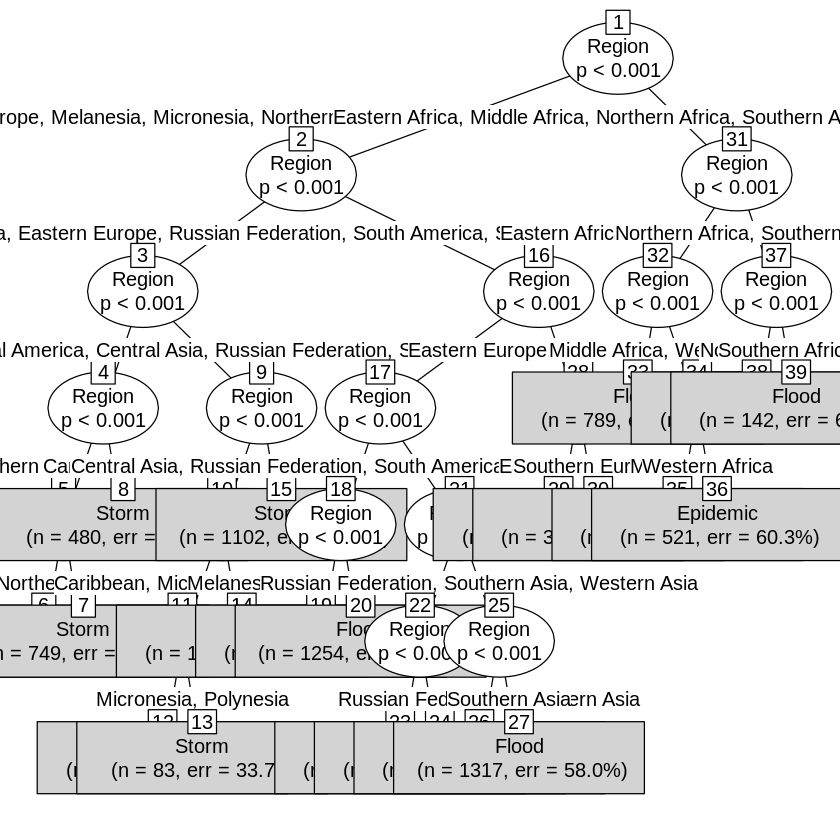

In [ ]:
head(disasterprediction)
plot(disaster_model, type="simple")
## The result is epidemic as the next predicted natural disaster -> Covid-19? 
## Floods seem to be more common as we discovered during our clustering / trend analysis phase 